#Chocolate Bar Analysis

#Cleaning Data

In [68]:
import pandas as pd
import altair as alt

In [69]:
df=pd.read_csv("https://raw.githubusercontent.com/emilyzhu44/Chocolate-Bar-Data-Analysis-/refs/heads/main/chocolate.csv")
df.head()


,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [70]:
#cleaning ingredients list and creating a new columnb for number_of_ingredients

df = df.dropna(subset=["ingredients"]).copy() #dropped all nan

df["ingredients"]=df["ingredients"].str.replace("-",",")
df["ingredients"]=df["ingredients"].str.replace(" ","")
df["ingredients"]=df["ingredients"].str.split(",")
df["number_of_ingredients"]=df["ingredients"].str[0]
df["ingredients"]=df["ingredients"].str[1:]


In [71]:
#turning ingredients list to dummy variables
ingred_dummies = pd.get_dummies(df["ingredients"].explode()).groupby(level=0).sum()

In [72]:
#used merge to add the dummies df to the orginal (by index)
df = df.merge(ingred_dummies, right_index=True, left_index=True)
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,number_of_ingredients,B,C,L,S,S*,Sa,V
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"[B, S, C]","rich cocoa, fatty, bready",3.25,3,1,1,0,1,0,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"[B, S, C]","cocoa, vegetal, savory",3.50,3,1,1,0,1,0,0,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"[B, S, C]","cocoa, blackberry, full body",3.75,3,1,1,0,1,0,0,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"[B, S, C]","chewy, off, rubbery",3.00,3,1,1,0,1,0,0,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"[B, S, C]","fatty, earthy, moss, nutty,chalky",3.00,3,1,1,0,1,0,0,0


In [73]:
#renaming ingredients from ingredient abbreviation to actual name
mapping={
    "B": "beans",
    "S": "sugar",
    "S*": "sweetener_other_than_white_cane_or_beet_sugar",
    "C": "cocoa_butter",
    "V": "vanilla",
    "L":"lecithin",
    "Sa":"salt"
}

In [74]:
#applying map to ingredients variable
df_modified = df["ingredients"].map(lambda x: [mapping[item] for item in x])
df["ingredients"]=df_modified

In [75]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,number_of_ingredients,B,C,L,S,S*,Sa,V
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"[beans, sugar, cocoa_butter]","rich cocoa, fatty, bready",3.25,3,1,1,0,1,0,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"[beans, sugar, cocoa_butter]","cocoa, vegetal, savory",3.50,3,1,1,0,1,0,0,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"[beans, sugar, cocoa_butter]","cocoa, blackberry, full body",3.75,3,1,1,0,1,0,0,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"[beans, sugar, cocoa_butter]","chewy, off, rubbery",3.00,3,1,1,0,1,0,0,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"[beans, sugar, cocoa_butter]","fatty, earthy, moss, nutty,chalky",3.00,3,1,1,0,1,0,0,0


In [76]:
#rename column names to full ingredients name
df.rename(columns=mapping, inplace = True)

In [77]:
#turning ingredients from list of str to str
df["ingredients"]=df["ingredients"].apply(lambda x: ', '.join(x))

In [78]:
df.head()


,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,number_of_ingredients,beans,cocoa_butter,lecithin,sugar,sweetener_other_than_white_cane_or_beet_sugar,salt,vanilla
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"beans, sugar, cocoa_butter","rich cocoa, fatty, bready",3.25,3,1,1,0,1,0,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"beans, sugar, cocoa_butter","cocoa, vegetal, savory",3.50,3,1,1,0,1,0,0,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"beans, sugar, cocoa_butter","cocoa, blackberry, full body",3.75,3,1,1,0,1,0,0,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"beans, sugar, cocoa_butter","chewy, off, rubbery",3.00,3,1,1,0,1,0,0,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"beans, sugar, cocoa_butter","fatty, earthy, moss, nutty,chalky",3.00,3,1,1,0,1,0,0,0


In [79]:
#mapping of continents
mapping_continents={"Venezuela":"South America",
                    "Peru":"South America",
                    "Ecuador":"South America",
                    "Suriname":"South America",
                    "Colombia":"South America",
                    "Bolivia":"South America",
                    "Brazil":"South America",
                    "Colombia":"South America",
                    "Dominican Republic":"North America",
                    "Costa Rica":"North America",
                    "Trinidad":"North America",
                    "Guatemala":"North America",
                    "Nicaragua":"North America",
                    "Mexico":"North America",
                    "Belize":"North America",
                    "Madagascar":"Africa",
                    "Principe":"Africa",
                    "Tanzania":"Africa",
                    "DR Congo":"Africa",
                    "Ghana":"Africa",
                    "India":"Asia",
                    "U.S.A.":"North America",
                    "Haiti":"North America",
                    "Honduras":"North America",
                    "Cuba":"North America",
                    "Jamaica":"North America",
                    "St. Lucia":"North America",
                    "Puerto Rico":"North America",
                    "El Salvador":"North America",
                    "Tobago":"North America",
                    "Grenada":"North America",
                    "St.Vincent-Grenadines":"North America",
                    "Panama":"North America",
                    "China":"Asia",
                    "Philippines":"Asia",
                    "Sulawesi":"Asia",
                    "Vietnam":"Asia",
                    "Malaysia":"Asia",
                    "Sumatra":"Asia",
                    "Indonesia":"Asia",
                    "Thailand":"Asia",
                    "Blend":"Blend",
                    "Papua New Guinea":"Oceania",
                    "Solomon Islands":"Oceania",
                    "Australia":"Oceania",
                    "Samoa":"Oceania",
                    "Fiji":"Oceania",
                    "Vanuatu":"Oceania",
                    "Uganda":"Africa",
                    "Sao Tome":"Africa",
                    "Ivory Coast":"Africa",
                    "Congo":"Africa",
                    "Sierra Leone":"Africa",
                    "Cameroon":"Africa",
                    "Togo":"Africa",
                    "Liberia":"Africa",
                    "Sao Tome & Principe":"Africa",
                    "Taiwan":"Asia",
                    "Burma":"Asia",
                    "Nigeria":"Africa",
                    "Sri Lanka":"Africa",
                    "Martinique":"Africa",
                    "Gabon":"Africa"
                    }


df["continent_of_bean_origin"]=df["country_of_bean_origin"].map(mapping_continents)

In [80]:
#Creating dummies for continent
continent_dummies = pd.get_dummies(df["continent_of_bean_origin"])
continent_dummies

,Africa,Asia,Blend,North America,Oceania,South America
0,True,False,False,False,False,False
1,False,False,False,True,False,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
2525,False,False,True,False,False,False
2526,False,False,False,False,False,True
2527,False,False,True,False,False,False
2528,True,False,False,False,False,False


In [81]:
#Checking for accurate data types
df.dtypes

,0
ref,int64
company_manufacturer,object
company_location,object
review_date,int64
country_of_bean_origin,object
specific_bean_origin_or_bar_name,object
cocoa_percent,object
ingredients,object
most_memorable_characteristics,object
rating,float64


In [82]:
#changed the number of ingredients into a int dtype
df['number_of_ingredients'] = df['number_of_ingredients'].astype(int)
#changed cocoa_percent to numeric aslo
df['cocoa_percent'] = df['cocoa_percent'].str.replace('%', '').astype(float)


# Q1: Does the bean’s continent of origin have a statistically significant impact on rating?

Box and Whisker plots

In [83]:
#rating and continent of bean origin
alt.Chart(df).mark_boxplot(extent="min-max").encode(
    alt.X("rating"),
    alt.Y("continent_of_bean_origin", scale=alt.Scale(zero=False)))


alt.Chart(...)

In [84]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [85]:
model = ols('rating ~  continent_of_bean_origin', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
continent_of_bean_origin,2.483547,5.0,2.716364,0.018717
Residual,445.625234,2437.0,NaN,NaN


Tukey for continent of bean

In [86]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['rating'],
                          groups=df['continent_of_bean_origin'],
                          alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       Africa          Asia  -0.0062    1.0 -0.1198  0.1075  False
       Africa         Blend  -0.1299 0.0257 -0.2503 -0.0095   True
       Africa North America  -0.0028    1.0  -0.081  0.0753  False
       Africa       Oceania   0.0108 0.9999 -0.1312  0.1528  False
       Africa South America   0.0098 0.9991 -0.0663  0.0859  False
         Asia         Blend  -0.1238 0.1089 -0.2619  0.0144  False
         Asia North America   0.0033    1.0 -0.1001  0.1067  False
         Asia       Oceania    0.017 0.9996 -0.1403  0.1743  False
         Asia South America    0.016 0.9977 -0.0859  0.1179  False
        Blend North America   0.1271 0.0138  0.0163  0.2378   True
        Blend       Oceania   0.1407 0.1322 -0.0215   0.303  False
        Blend South America   0.1397 0.0037  0.0304  0.2491   

#Q2: Are certain characteristics more associated with chocolate bars of specific ingredients, bean origins, and ratings?

In [87]:
len(df["most_memorable_characteristics"].unique())

2403

We decided against pursuing analyzing the characteristics category as there were 2403 unique items.

However, we tried out an analysis of ingredient combinations and number of ingredients on rating.

In [88]:
df.groupby("ingredients")["rating"].mean().sort_values(ascending=False)

,rating
ingredients,
"beans, sugar, cocoa_butter",3.278529
"beans, sugar",3.229457
"beans, sugar, cocoa_butter, lecithin",3.213287
"beans, sugar, vanilla",3.166667
"beans, sugar, cocoa_butter, salt",3.150000
"beans, sweetener_other_than_white_cane_or_beet_sugar, cocoa_butter, salt",3.112500
"beans, sugar, cocoa_butter, vanilla, lecithin",3.089674
"beans, sweetener_other_than_white_cane_or_beet_sugar, vanilla, lecithin",3.083333
"beans, cocoa_butter",3.000000


Here is the OLS analysis:

In [89]:
model = ols("rating ~ ingredients", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
ingredients,24.017872,20.0,6.858351,7.151651e-19
Residual,424.090908,2422.0,NaN,NaN


In [90]:
tukey = pairwise_tukeyhsd(endog=df['rating'],
                          groups=df["ingredients"],
                          alpha=0.05)

In [91]:
# Convert summary to DataFrame
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Filter rows where reject == True
significant_results = tukey_df[tukey_df['reject'] == True]
significant_results

,group1,group2,meandiff,p-adj,lower,upper,reject
43,"beans, sugar","beans, sugar, cocoa_butter, vanilla",-0.2543,0.0000,-0.3920,-0.1166,True
44,"beans, sugar","beans, sugar, cocoa_butter, vanilla, lecithin",-0.1398,0.0092,-0.2633,-0.0162,True
47,"beans, sugar","beans, sugar, lecithin",-0.5420,0.0396,-1.0735,-0.0104,True
60,"beans, sugar, cocoa_butter","beans, sugar, cocoa_butter, vanilla",-0.3034,0.0000,-0.4379,-0.1688,True
61,"beans, sugar, cocoa_butter","beans, sugar, cocoa_butter, vanilla, lecithin",-0.1889,0.0000,-0.3088,-0.0689,True
64,"beans, sugar, cocoa_butter","beans, sugar, lecithin",-0.5910,0.0118,-1.1218,-0.0603,True
67,"beans, sugar, cocoa_butter","beans, sweetener_other_than_white_cane_or_beet...",-0.3189,0.0053,-0.5915,-0.0462,True
76,"beans, sugar, cocoa_butter, lecithin","beans, sugar, cocoa_butter, vanilla",-0.2381,0.0000,-0.3920,-0.0843,True


#Q3: Do the number of ingredients have a statistically significant impact on rating score?

OLS model of number of ingredients

In [92]:
model = ols("rating ~ number_of_ingredients", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
number_of_ingredients,4.377233,1.0,24.079483,9.853255e-07
Residual,443.731547,2441.0,NaN,NaN


In [93]:
tukey = pairwise_tukeyhsd(endog=df['rating'],
                          groups=df["number_of_ingredients"],
                          alpha=0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.2597,0.6674,-0.2356,0.7549,False
1,3,0.3105,0.4725,-0.1843,0.8052,False
1,4,0.1696,0.9261,-0.3268,0.666,False
1,5,0.1215,0.9829,-0.3795,0.6225,False
1,6,-0.0208,1.0,-0.8008,0.7591,False
2,3,0.0508,0.1258,-0.0073,0.1089,False
2,4,-0.0901,0.0042,-0.1612,-0.0189,True
2,5,-0.1382,0.0008,-0.2361,-0.0402,True
2,6,-0.2805,0.7737,-0.8863,0.3253,False
3,4,-0.1409,0.0,-0.2083,-0.0735,True


In [94]:
# Convert summary to DataFrame
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Filter rows where reject == True
significant_results = tukey_df[tukey_df['reject'] == True]
significant_results

,group1,group2,meandiff,p-adj,lower,upper,reject
6,2,4,-0.0901,0.0042,-0.1612,-0.0189,True
7,2,5,-0.1382,0.0008,-0.2361,-0.0402,True
9,3,4,-0.1409,0.0000,-0.2083,-0.0735,True
10,3,5,-0.1890,0.0000,-0.2842,-0.0937,True


#Q4: Can the rating of a chocolate be predicted well, using the infomration about it's origin and ingredients?

**Model for predicting Rating (KNeighbors)**

In [95]:
#Imports for model
from sklearn.neighbors import KNeighborsRegressor  # I think a K-Neighbors model would work better in this scenerio
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [96]:
df.columns

Index(['ref', 'company_manufacturer', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'ingredients', 'most_memorable_characteristics',
       'rating', 'number_of_ingredients', 'beans', 'cocoa_butter', 'lecithin',
       'sugar', 'sweetener_other_than_white_cane_or_beet_sugar', 'salt',
       'vanilla', 'continent_of_bean_origin'],
      dtype='object')

In [97]:
X = df[[#'country_of_bean_origin',
        'continent_of_bean_origin',
        'company_manufacturer',
        #'company_location',
        'cocoa_percent',
        'number_of_ingredients',
        'beans', 'cocoa_butter', 'lecithin', 'sugar', 'sweetener_other_than_white_cane_or_beet_sugar', 'salt', 'vanilla']]
y = df['rating']

Running a K-Neighbors Model

In [98]:
#K-Neighbors Regressor
encode = OneHotEncoder(sparse_output=False,
                       handle_unknown='ignore')
scaler = StandardScaler()

ct = make_column_transformer((encode, [#'country_of_bean_origin',
                                       'continent_of_bean_origin',
                                       "company_manufacturer",
                                       #'company_location',
                                       ]
                              ),
                             remainder = "passthrough"
                             )

pipeline = make_pipeline(ct,
                         #scaler,
                         KNeighborsRegressor(n_neighbors = 14)
                         )

pipeline.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['continent_of_bean_origin',
                                                   'company_manufacturer'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=14))])

Training and Test Coefficents of Determination:

In [99]:
#Training coef of determination
y_ = pipeline.predict(X)
r2_score(y, y_)

0.16451022011857908

In [100]:
#Test Coef of determination
cross_val_score(pipeline, X, y, scoring='r2').mean()

np.float64(-0.04220942435762818)

Grid Search to Find the Best parameter for K

In [101]:
#Using 90% to train and %10 to test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=365, test_size=0.10)

In [102]:
grid = GridSearchCV(pipeline,
                  {'kneighborsregressor__n_neighbors': range(2, 30)},
                  scoring='r2')
grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['continent_of_bean_origin',
                                                                          'company_manufacturer'])])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor(n_neighbors=14))]),
             param_grid={'kneighborsregressor__n_neighbors': range(2, 30)},
             scoring='r2')

In [103]:
grid.best_params_, grid.best_score_

({'kneighborsregressor__n_neighbors': 14}, np.float64(0.05798887492705076))

Since this model is not that great, we tried to see if Ensemble methods would improve preformance.

**Voting Regressor**


In [104]:
from sklearn.ensemble import VotingRegressor

In [105]:
X = df[[#'country_of_bean_origin',
        #'continent_of_bean_origin',
        #'company_manufacturer',
        #'company_location',
        'cocoa_percent',
        'number_of_ingredients',
        'beans', 'cocoa_butter', 'lecithin', 'sugar', 'sweetener_other_than_white_cane_or_beet_sugar', 'salt', 'vanilla']]
y = df['rating']

In [106]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X=X, y=y)

k_neighbors=KNeighborsRegressor()
k_neighbors.fit(X=X, y=y)

KNeighborsRegressor()

In [107]:
ensemble_model = VotingRegressor([
    ("linear", linear_model),
    ("knn", k_neighbors)
])
ensemble_model.fit(X=X, y=y)

VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('knn', KNeighborsRegressor())])

Coefficents of Determination for Voting Method

In [108]:
y_ = ensemble_model.predict(X)
r2_score(y, y_)

0.04453802830913156

In [109]:
cross_val_score(ensemble_model, X, y, scoring='r2').mean()

np.float64(-0.004608377846626132)

**Stacking Regressor**




In [110]:
from sklearn.ensemble import StackingRegressor

stacking_model = StackingRegressor([
    ("linear", linear_model),
    ("knn", k_neighbors)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X=X, y=y)


StackingRegressor(estimators=[('linear', LinearRegression()),
                              ('knn', KNeighborsRegressor())],
                  final_estimator=LinearRegression())

Coefficents of Determination for Stacking Method

In [111]:
y_ = stacking_model.predict(X)
r2_score(y, y_)

0.052100773800294764

In [112]:
cross_val_score(stacking_model, X, y, scoring='r2').mean()

np.float64(0.021330995160120225)

Although the Stacking Method did have a positive test coefficent of determination, neither of these ensemble methods are good models.
So, we decided to look at different types of Regression models to see if they would work better.

**Ridge Regression**

In [113]:
X = df[[#'country_of_bean_origin',
        'continent_of_bean_origin',
        'company_manufacturer',
        #'company_location',
        'cocoa_percent',
        'number_of_ingredients',
        'beans', 'cocoa_butter', 'lecithin', 'sugar', 'sweetener_other_than_white_cane_or_beet_sugar', 'salt', 'vanilla']]
y = df['rating']

In [114]:
from sklearn.linear_model import Ridge

ridge_pipeline = make_pipeline(ct,
                               Ridge(alpha=1.0)
                         )

ridge_pipeline.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['continent_of_bean_origin',
                                                   'company_manufacturer'])])),
                ('ridge', Ridge())])

Coefficents of Determination for Ridge Regressor

In [115]:
y_ = ridge_pipeline.predict(X)
r2_score(y, y_)

0.41062779690905826

In [116]:
cross_val_score(ridge_pipeline, X, y, scoring='r2', cv=10).mean()

np.float64(-0.031115755961708447)

**Decision Tree Regressor**

In [117]:
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = make_pipeline(ct,
                              DecisionTreeRegressor(random_state=30)
                              )

tree_pipeline.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['continent_of_bean_origin',
                                                   'company_manufacturer'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=30))])

Coefficents of Determination for Decision Tree Regressor

In [118]:
y_ = tree_pipeline.predict(X)
r2_score(y, y_)

0.8015835494060043

In [119]:
cross_val_score(tree_pipeline, X, y, scoring='r2', cv=10).mean()

np.float64(-0.31724584566011876)

#Visualizations that did not work well

**Distribution of bean origin**

<Axes: ylabel='country_of_bean_origin'>

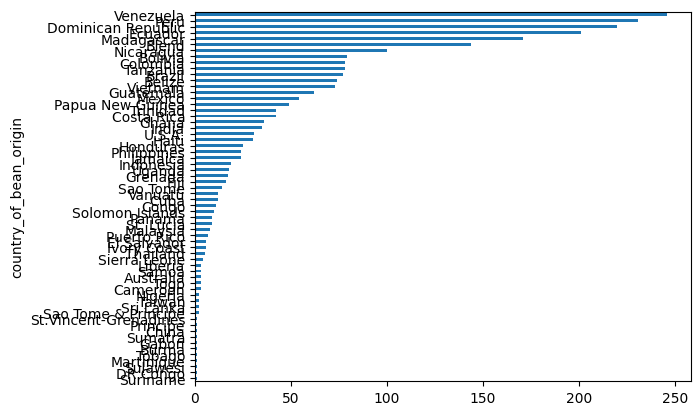

In [120]:
num_per_origin = df['country_of_bean_origin'].value_counts().sort_values(ascending=True)
num_per_origin.plot.barh()

<Axes: ylabel='country_of_bean_origin'>

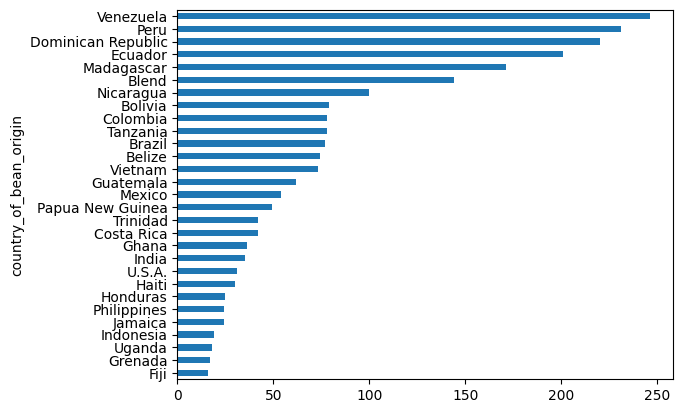

In [121]:
#Since theres a lot of chart junk, im going to subset
num_per_origin[num_per_origin > 15].plot.barh() #Includes only countries with more than 15 observations.

<Axes: ylabel='country_of_bean_origin'>

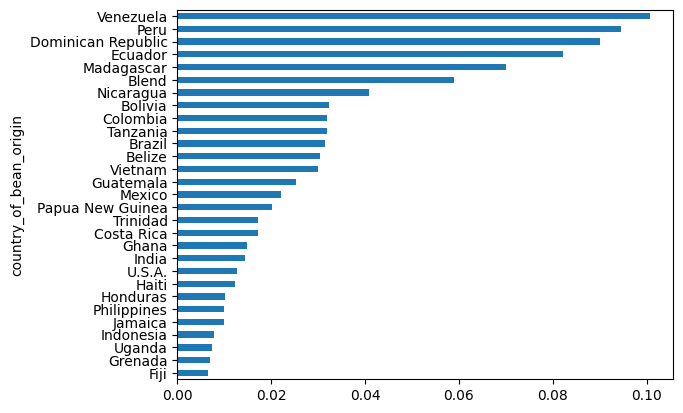

In [122]:
#Normalized verison:
num_per_origin_norm = df['country_of_bean_origin'].value_counts(normalize=True).sort_values(ascending=True)
num_per_origin_norm[num_per_origin > 15].plot.barh()

<Axes: ylabel='count'>

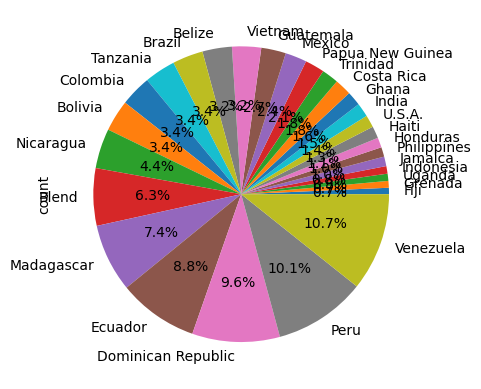

In [123]:
num_per_origin[num_per_origin > 15].plot.pie(autopct='%1.1f%%')

**Mean Ratings by...**

<Axes: xlabel='company_location'>

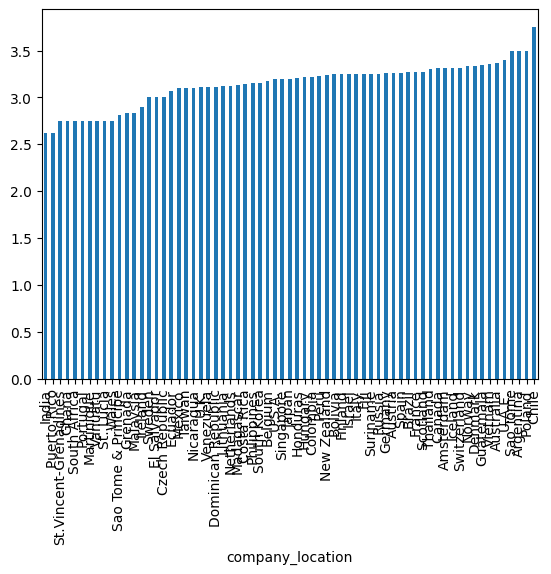

In [124]:
df.groupby('company_location')['rating'].mean().sort_values(ascending=True).plot.bar()

<Axes: xlabel='country_of_bean_origin'>

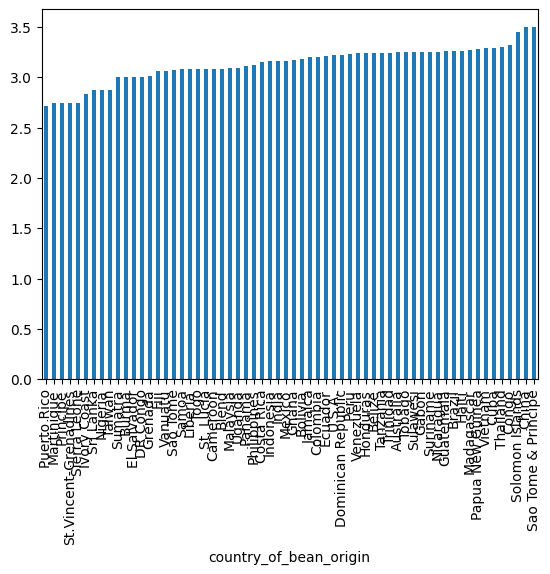

In [125]:
df.groupby('country_of_bean_origin')['rating'].mean().sort_values(ascending=True).plot.bar()

In [126]:
alt.Chart(df).mark_point().encode(
    x="cocoa_percent",
    y="rating"
)

alt.Chart(...)

#Visualizations that worked well

<Axes: title={'center': 'Bean Origin'}>

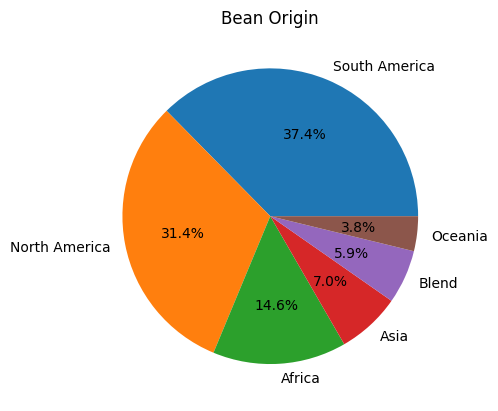

In [127]:
#continent of bean origin pie chart
df["continent_of_bean_origin"].value_counts().plot.pie(autopct='%1.1f%%',title="Bean Origin",ylabel="")

**Distribution of Company Location**

<Axes: ylabel='company_location'>

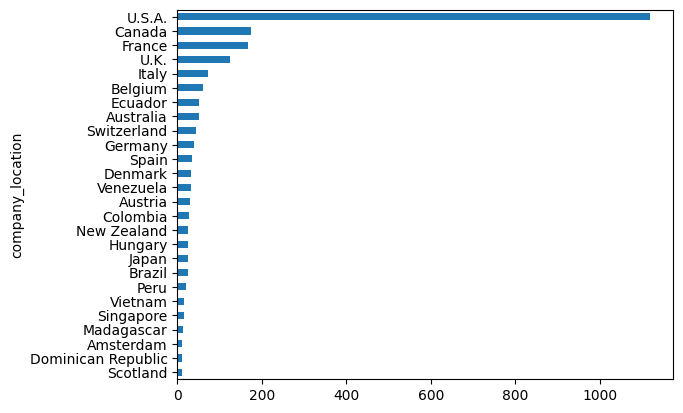

In [128]:
num_per_company = df['company_location'].value_counts().sort_values(ascending=True)
num_per_company[num_per_company > 10].plot.barh()

In [129]:
df.groupby("company_manufacturer")["rating"].mean().sort_values(ascending=False)[:5]

,rating
company_manufacturer,
Ocelot,3.875000
Heirloom Cacao Preservation (Zokoko),3.875000
Matale,3.812500
Patric,3.791667
Idilio (Felchlin),3.775000


In [130]:
df["cocoa_percent"].corr(df["rating"])

np.float64(-0.07717329423244065)